<a href="https://colab.research.google.com/github/rladbtls3/202401PracticeForAiDeeplearning/blob/main/chapter03_introduction_to_keras_and_tf_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?
파이썬 기반 머신러닝 오픈소스, 구글 개발


## What's Keras?
딥러닝 API(파이썬)

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)#tensor의 차원, 평균, 표준오차
print(x)

tf.Tensor(
[[ 0.9017365 ]
 [-0.09508494]
 [ 1.0054626 ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.6601099 ]
 [0.28030336]
 [0.24778426]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.;x#주소 참조를 통한 값의 변경이 가능

array([[0., 1.],
       [1., 1.]])

In [ ]:
"""
그에 반해 tf는 주소 참조를 통한 값의 변경이 불가능하다.
y = tf.ones(shape = (2,2))
y[0,0] = 0 -> error
"""

'\n그에 반해 tf는 주소 참조를 통한 값의 변경이 불가능하다.\ny = tf.ones(shape = (2,2))\ny[0,0] = 0 -> error\n'

**Creating a TensorFlow variable**

In [ ]:
#값을 변경할 수 있는 메서드
#가중치 갱신을 위해서라도..
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.3945838 ],
       [-0.5625872 ],
       [ 0.49593648]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [ ]:
#.assign 메서드를 이용하여 값 변경
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [ ]:
#특정 원소만 변경 가능
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [ ]:
#.assing_add는 행렬 더하기 연산 후 원래 변수에 할당?
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)#행렬 각 원소의 제곱
c = tf.sqrt(a)#행렬 각 원소의 제곱근
d = b + c#행렬 합연산
e = tf.matmul(a, b)#행렬곱
e *= d#e와 d를 곱한 결과를 e에 할당. 이 떄는 행렬곱이 아닌, 각 원소별 연산
print(a,b,c,d,e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)#자동 미분, 동적으로 미분값 확인 가능 / tape.gradient(loss, weight)

**Using `GradientTape` with constant tensor inputs**

In [ ]:
#변수가 아닌 상수 입력값의 경우...?
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [ ]:
#입력 데이터 생성
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

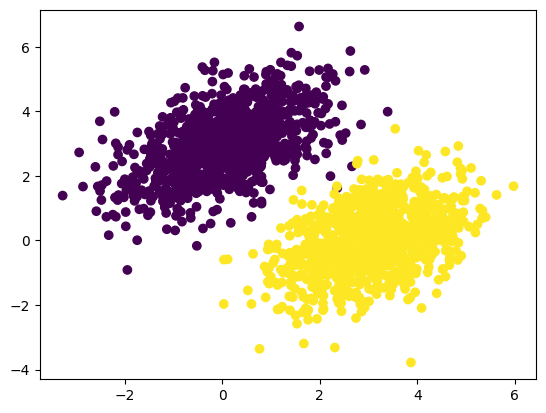

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [ ]:
#선형 분류. 두 그룹의 경계선을 적합...?
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b
#가중합 + 오차 를 반환받는 함수 model

**The mean squared error loss function**

In [ ]:
#손실함수 정의
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)#잔차제곱합?
    return tf.reduce_mean(per_sample_losses)#잔차제곱합의 평균을 반환하는 함수

**The training step function**

In [ ]:
#경사하강법을 이용한 모델 만들기
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [ ]:
#rnage 안의 수가 batch size. 바꾸면서 분류 시켜보면 적합선이 어찌 적합되는지를 볼 수 있다.
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step+1}: {loss:.4f}")

Loss at step 1: 8.4882
Loss at step 2: 1.1349
Loss at step 3: 0.2926
Loss at step 4: 0.1824
Loss at step 5: 0.1588
Loss at step 6: 0.1463
Loss at step 7: 0.1359
Loss at step 8: 0.1266
Loss at step 9: 0.1180
Loss at step 10: 0.1102
Loss at step 11: 0.1030
Loss at step 12: 0.0965
Loss at step 13: 0.0905
Loss at step 14: 0.0850
Loss at step 15: 0.0800
Loss at step 16: 0.0755
Loss at step 17: 0.0713
Loss at step 18: 0.0674
Loss at step 19: 0.0639
Loss at step 20: 0.0607
Loss at step 21: 0.0578
Loss at step 22: 0.0551
Loss at step 23: 0.0527
Loss at step 24: 0.0505
Loss at step 25: 0.0484
Loss at step 26: 0.0465
Loss at step 27: 0.0448
Loss at step 28: 0.0433
Loss at step 29: 0.0418
Loss at step 30: 0.0405
Loss at step 31: 0.0393
Loss at step 32: 0.0382
Loss at step 33: 0.0372
Loss at step 34: 0.0363
Loss at step 35: 0.0355
Loss at step 36: 0.0347
Loss at step 37: 0.0340
Loss at step 38: 0.0334
Loss at step 39: 0.0328
Loss at step 40: 0.0323


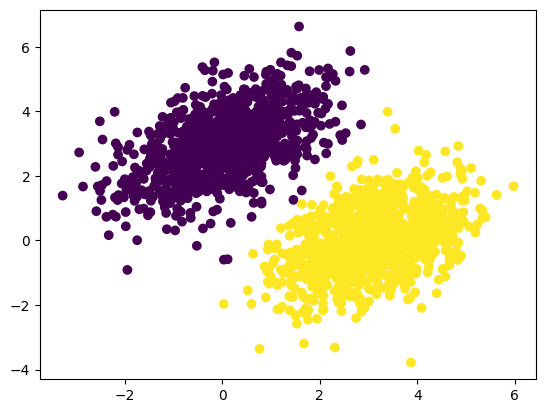

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

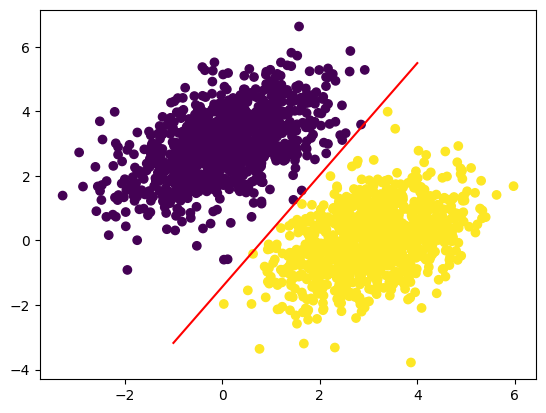

In [ ]:
#적합된 분류선을 그려주기
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):#케라스 기본 레이어 클래스

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units#출력 차원
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)#(output_size, activation_func)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [ ]:
#이젠 텐서플로를 이용, layer를 만들어보자
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)
#모델 적합

Epoch 1/5
16/16 [==============================] - 0s 3ms/step - loss: 0.3079 - binary_accuracy: 0.5000
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 0.2537 - binary_accuracy: 0.5050
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 0.2131 - binary_accuracy: 0.5465
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 0.1782 - binary_accuracy: 0.6265
Epoch 5/5
16/16 [==============================] - 0s 4ms/step - loss: 0.1486 - binary_accuracy: 0.7170


In [ ]:
history.history

{'loss': [0.3078666031360626,
  0.25371646881103516,
  0.21307970583438873,
  0.17824597656726837,
  0.1486315131187439],
 'binary_accuracy': [0.5,
  0.5049999952316284,
  0.546500027179718,
  0.6265000104904175,
  0.7170000076293945]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
#검증 데이터를 이용, 학습이 완료된 모델의 성능 평가
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
#전체 데이터를 학습 7, 검증 3으로 분할
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)#이를 통해 과적합 등을 판단 가능
)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 0.3759 - binary_accuracy: 0.8907 - val_loss: 0.1145 - val_binary_accuracy: 0.9167
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0742 - binary_accuracy: 0.9493 - val_loss: 0.0292 - val_binary_accuracy: 0.9967
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0733 - binary_accuracy: 0.9536 - val_loss: 0.3391 - val_binary_accuracy: 0.7767
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0686 - binary_accuracy: 0.9614 - val_loss: 0.0524 - val_binary_accuracy: 0.9867
Epoch 5/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0717 - binary_accuracy: 0.9543 - val_loss: 0.0562 - val_binary_accuracy: 0.9800


### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)#학습 종료 후, 모델의 예측력을 확인하기 위해 예측에 사용
print(predictions[:10])

5/5 [==============================] - 0s 4ms/step
[[ 0.03610805]
 [-0.05368221]
 [ 0.6953025 ]
 [-0.21283206]
 [ 0.9520513 ]
 [ 1.0416235 ]
 [-0.16711631]
 [ 0.68323725]
 [-0.20796451]
 [ 0.726894  ]]


## Summary